Globals

In [14]:
colors = ["#ef476f", "#073b4c"]
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_regions(X_set, Y_set, classifier):
    cmap = ListedColormap((colors[0], colors[1]))

    # np.meshgrid generates an n-dimensional grid from n numpy arrays
    X, Y = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    
    # It creates a contourf plot where X, Y are co-ordinates and the classifier's result
    # which is in the shape of X is treated as the height
    # alpha is used to set opacity of the filled contours
    Z = classifier.predict(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
    plt.contour(X, Y, Z, alpha=0.1, cmap=cmap)

    # It creates a scatter plot and Y_set==i acts as a mask
    for index, i in enumerate(np.unique(Y_set)):
        plt.scatter(
            x=X_set[Y_set == i, 0],
            y=X_set[Y_set == i, 1],
            alpha=0.8,
            c=cmap(index),
            marker="+",
            label=i,
        )

# Linear SVM

In [15]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Loading Datasets
iris = datasets.load_iris()
features = iris.data[:100, :]
target = iris.target[:100]

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create Support Vector Machine Object
svc = SVC(kernel="linear", random_state=0)

# Train Classifier
model = svc.fit(features_standardized, target)

# View Support Vectors
print(model.support_vectors_)

# Index of the Support Vectors
print(model.support_)

# Number of Support Vectors 
# belonging to their respective classes
print(model.n_support_)

[[-0.5810659   0.42196824 -0.80497402 -0.50860702]
 [-1.52079513 -1.67737625 -1.08231219 -0.86427627]
 [-0.89430898 -1.4674418   0.30437864  0.38056609]
 [-0.5810659  -1.25750735  0.09637501  0.55840072]]
[23 41 57 98]
[2 2]


# SVC Probabilities

In [16]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Loading Datasets
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create Support Vector Machine Object
svc = SVC(kernel="linear", probability=True, random_state=0)

# Train Classifier
model = svc.fit(features_standardized, target)

# Create New Observation
new_observation = [[0.4 for i in range(4)]]

# View Predicted Probabilities
print(model.predict_proba(new_observation))

[[0.00541761 0.97348825 0.02109414]]


# SVM Non-Linear

/tmp/ipykernel_8385/1614391566.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


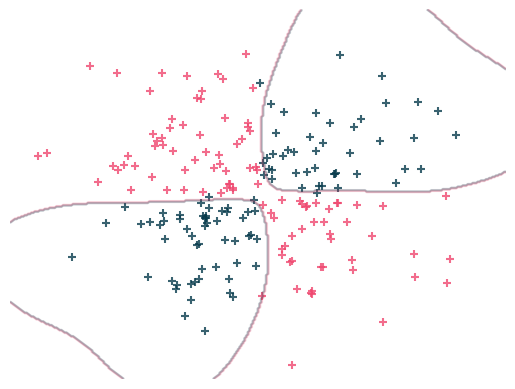

In [17]:
import numpy as np
from sklearn.svm import SVC

# Set Random Seed as 0 to ensure reproducability
np.random.seed(0)

# Generate two feature sets
features = np.random.randn(200, 2)

# Use a XOR gate to generate linearly inseperable classes
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

# Create a SVM with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# Train the Classifier
model = svc.fit(features, target)

# Plot Observations and Hyperplane
plot_decision_regions(features, target, classifier=svc)
plt.axis("off")
plt.show()

# SVC Vector

/tmp/ipykernel_8385/1614391566.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


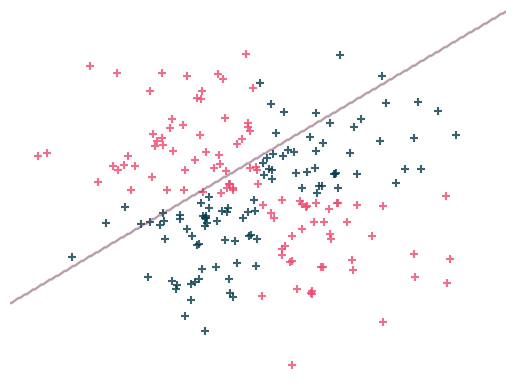

In [18]:
import numpy as np
from sklearn.svm import SVC

# Create Support Vector Classifier with a linear kernel
svc_linear = SVC(kernel="linear", random_state=0, C=1)

# Set Random Seed as 0 to ensure reproducability
np.random.seed(0)

# Generate two feature sets
features = np.random.randn(200, 2)

# Use a XOR gate to generate linearly inseperable classes
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

# Train Model
model = svc_linear.fit(features, target)

# Plot Observations and Hyperplane
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off")
plt.show()